The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



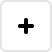
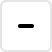
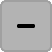
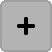
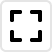
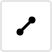
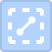
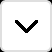
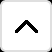
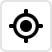
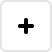
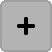
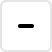
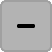
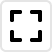
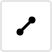
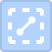
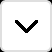
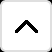
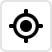

In [1]:
import math
import random
import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.geo_data import *
LetsPlot.setup_html()

# Scatter plot

In [2]:
n = 450
x_range = np.arange(-2 * math.pi, 2 * math.pi, 4 * math.pi / n)
y_range = np.sin(x_range) + np.array([random.uniform(-.5, .5) for i in range(n)])
df = pd.DataFrame({ 'x' : x_range, 'y' : y_range })

ggplot(df, aes(x='x', y='y')) \
    + geom_point(shape=21, fill='yellow', color='#8c564b') \
    + geom_smooth(method='loess', span=.2, size=1.5, color='#9467bd')

# Map plot

In [3]:
countries = geocode_countries().get_boundaries()

In [4]:
ggplot() + geom_map(aes(fill='country'), map=countries, size=0.1, show_legend=False) + coord_map() + ggsize(1000, 800)

# Bar plot

In [5]:
mpg_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')

In [6]:
annotation = (layer_labels()
               # .line('@drv')
                .line('@..count..')
                .line('@..proppct..')
                .format('..proppct..', '{d}%'))

ggplot(mpg_df, aes('class', fill='drv')) \
    + geom_bar(labels=annotation, tooltips='none') \
    + theme(legend_position='none')

# Facets

Shared axis doesn't work with panning

In [7]:
plot_data = pd.DataFrame.from_records([
    ("pet", "cat", 5),
    ("pet", "dog", 10),
    ("pet", "rabbit", 2),
    ("pet", "hamster", 1),

    ("farm_animal", "cow", 500),
    ("farm_animal", "pig", 100),
    ("farm_animal", "horse", 700),
])
plot_data.columns = ("animal_type", "animal", "weight")

plot = (
    ggplot(plot_data, aes(x="animal", y="weight"))
    + facet_grid(y="animal_type", scales="free_y")
    + geom_bar(stat="identity", size=0.5, color="black")
    + theme_bw()
    + theme(
        panel_grid_minor=element_blank()
    )
)
plot + ggtitle('Panning renders the ticks useless')

# Marginal layers

Not yet supported

In [8]:
np.random.seed(0)

cov0=[[1, -.8],
     [-.8, 1]]
cov1=[[ 10, .1],
       [.1, .1]]

x0, y0 = np.random.multivariate_normal(mean=[-2,0], cov=cov0, size=200).T
x1, y1 = np.random.multivariate_normal(mean=[0,1], cov=cov1, size=200).T

data = dict(
    x = np.concatenate((x0,x1)),
    y = np.concatenate((y0,y1)),
    c = ["A"]*200 + ["B"]*200
)

p = ggplot(data, aes("x", "y", color="c", fill="c")) + geom_point()
p + ggmarginal("tr", layer=geom_density(alpha=0.3, show_legend=False))